In [63]:
#import library yang ingin digunakan
#citation
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [64]:
#ekstrak data txt
data = open ("D:/KULIAH/Data Observasi/2022-04-05/fotometriv836cen.txt","r")
x = data.readlines()
for i in range (len(x)):
    x[i]=x[i].split()

waktu = []
MBV = []
MBS1 = []
MBS2 = []
MBS3 = []
MBS4 = []
MBS5 = []

In [65]:
#memasukkan data
#mbv sebagai mag bintang variabel
#mbs1 sebagai bintang standar 1
#mbs2 sebagai bintang standar 2
#mbs3 adalah bintang variabel - bintang standar 2
#mbs4 adalah bintang standar 1 - bintang standar 2 untuk melihat apakah bintang pembanding adalah bintang standar
for i in range (len(x)):
    waktu.append(float(x[i][0]))
    MBV.append(float(x[i][1]))
    MBS1.append(float(x[i][2]))
    MBS2.append(float(x[i][3]))
    MBS3.append(float(x[i][1])-(float(x[i][2])))
    MBS4.append(float(x[i][2])-(float(x[i][3])))

In [66]:
#mengubah data menjadi dataframe dengan pandas
d = {'Time (Hour)': waktu, 'Variable Star Mag': MBS3, 'Standard Star Mag': MBS4, 'Real star mag': MBV, 'Comparison Star': MBS1, 'Comp Star': MBS2}
df = pd.DataFrame(d)
df

,Time (Hour),Variable Star Mag,Standard Star Mag,Real star mag,Comparison Star,Comp Star
0,2.459674e+06,-0.882,-1.775,-17.996,-17.114,-15.339
1,2.459674e+06,-0.833,-1.756,-17.964,-17.131,-15.375
2,2.459674e+06,-0.847,-1.794,-17.990,-17.143,-15.349
3,2.459674e+06,-0.885,-1.759,-17.903,-17.018,-15.259
4,2.459674e+06,-0.848,-1.777,-17.989,-17.141,-15.364
...,...,...,...,...,...,...
233,2.459674e+06,-0.744,-1.773,-17.803,-17.059,-15.286
234,2.459674e+06,-0.772,-1.763,-17.831,-17.059,-15.296
235,2.459674e+06,-0.745,-1.738,-17.789,-17.044,-15.306
236,2.459674e+06,-0.745,-1.747,-17.789,-17.044,-15.297


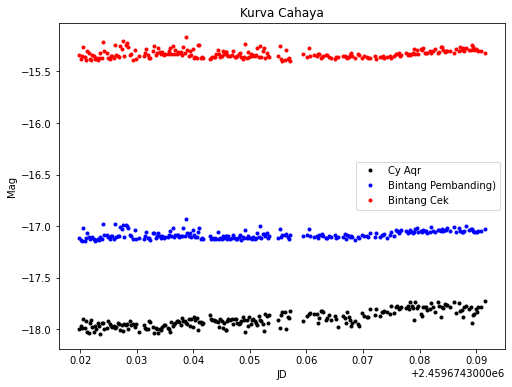

In [67]:
#plotting data
plt.figure(figsize=(8,6))
plt.plot(df['Time (Hour)'],df['Real star mag'],'k.',label='Cy Aqr')
plt.plot(df['Time (Hour)'],df['Comparison Star'],'b.',label='Bintang Pembanding)')
plt.plot(df['Time (Hour)'],df['Comp Star'],'r.',label='Bintang Cek')
plt.legend(loc= 'best')
plt.title("Kurva Cahaya")
plt.xlabel("JD")
plt.ylabel("Mag")
plt.show()

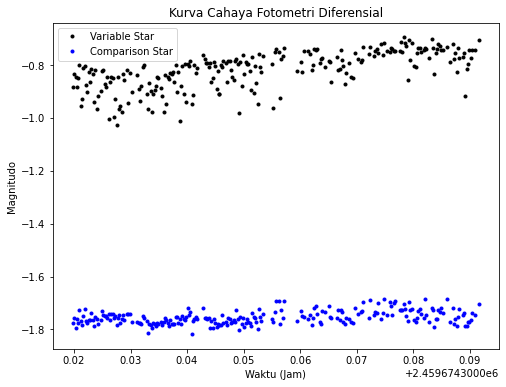

In [68]:
#fotometri diferensial
#plotting data
plt.figure(figsize=(8,6))
plt.plot(df['Time (Hour)'],df['Variable Star Mag'],'k.',label='Variable Star')
plt.plot(df['Time (Hour)'],df['Standard Star Mag'],'b.',label='Comparison Star')
#plt.plot(df['Time (Hour)'],df['Real star mag'],'r.',label='Variable Star')
plt.title("Kurva Cahaya Fotometri Diferensial")
plt.xlabel("Waktu (Jam)")
plt.ylabel("Magnitudo")
plt.legend(loc= 'best')
plt.show()

In [69]:
X1 = np.array(df.iloc[:,0])
y1 = np.array(df.iloc[:,1])

from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.sin(b*(x - c)) + d

params, params_covariance = optimize.curve_fit(test_func, X1, y1, maxfev=5000)

print(params)

[ 19.7783598    1.00004516 105.21477082 -20.62575891]


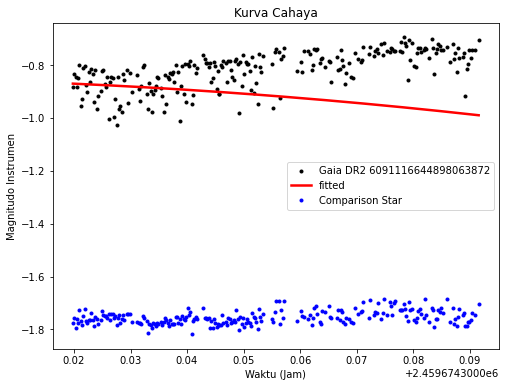

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(X1, y1, marker='.',c='k',label='Gaia DR2 6091116644898063872')
plt.plot(X1, test_func(X1, params[0], params[1], params[2], params[3]), 'r-',lw=2.5, label='fitted')
plt.plot(df['Time (Hour)'],df['Standard Star Mag'],'b.',label='Comparison Star')
plt.title('Kurva Cahaya')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Magnitudo Instrumen')
plt.legend(loc='best')
plt.show()

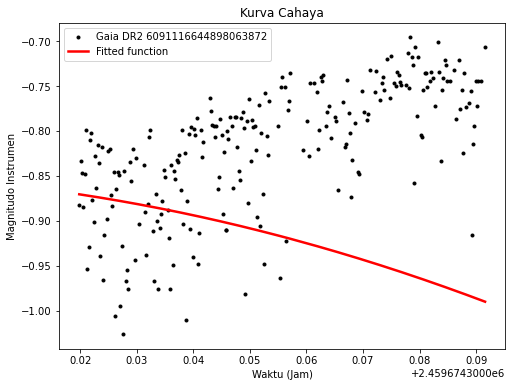

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(X1, y1, marker='.',c='k',label='Gaia DR2 6091116644898063872')
plt.plot(X1, test_func(X1, params[0], params[1], params[2], params[3]), 'r-',lw=2.5, label='Fitted function')
#plt.plot(df['Time (Hour)'],df['Standard Star Mag']+5.3,'b.',label='Comparison Star')
plt.title('Kurva Cahaya')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Magnitudo Instrumen')
plt.legend(loc='best')
plt.show()

In [72]:
from astropy.timeseries import LombScargle
import astropy.units as u
for i in df.index:
    t = df['Time (Hour)']
    lk = df['Variable Star Mag']

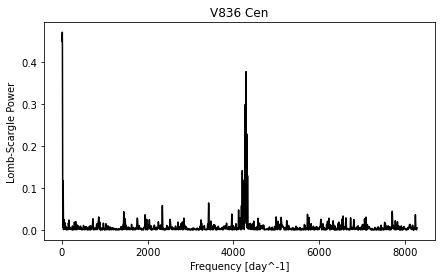

In [73]:
from astropy.timeseries import LombScargle
dy = 0.1
ls = LombScargle(t,lk,dy)
frequency, power = ls.autopower()
plt.figure(figsize=(7,4))
plt.title('V836 Cen')
plt.xlabel('Frequency [day^-1]')
plt.ylabel('Lomb-Scargle Power')
plt.plot(frequency, power,'k')  

Best frequency: 9.750553000508162 [1/day] 
 or 
Best period: 0.10255828566317046 [days]


Text(-5, 5, 'Period = 0.102558 days')

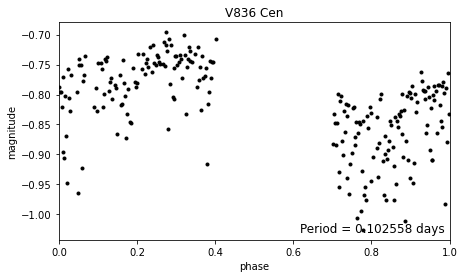

In [74]:
period = 1/frequency

best_frequency = frequency[np.argmax(power)]
best_period = period[np.argmax(power)]

print(f"Best frequency: {best_frequency} [1/day] \n or \nBest period: {best_period} [days]")
lit_period = best_period

plt.figure(figsize=(7,4))
plt.errorbar(((t-t[len(t)//2]) % lit_period) / lit_period, lk, fmt="k.")
plt.ylabel("magnitude")
plt.xlabel("phase")
plt.xlim(0, 1)
plt.title("V836 Cen")
plt.annotate("Period = {0:.6f} days".format(lit_period), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,
)

Best frequency: 9.750553000508162 [1/day] 
 or 
Best period: 0.10255828566317046 [days]


Text(-5, 5, 'Period = 0.154776 days')

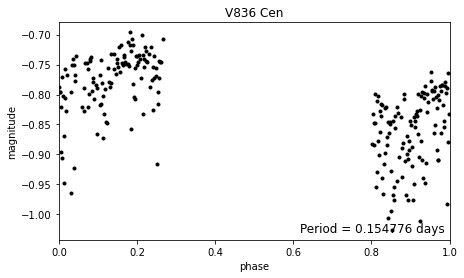

In [75]:
period = 1/frequency

best_frequency = frequency[np.argmax(power)]
best_period = period[np.argmax(power)]

print(f"Best frequency: {best_frequency} [1/day] \n or \nBest period: {best_period} [days]")
lit_period = 0.154776

plt.figure(figsize=(7,4))
plt.errorbar(((t-t[len(t)//2]) % lit_period) / lit_period, lk, fmt="k.")
plt.ylabel("magnitude")
plt.xlabel("phase")
plt.xlim(0, 1)
plt.title("V836 Cen")
plt.annotate("Period = {0:.6f} days".format(lit_period), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,
)

The fit period is  0.1547760 days
The fit semi-amplitude is    0.07155


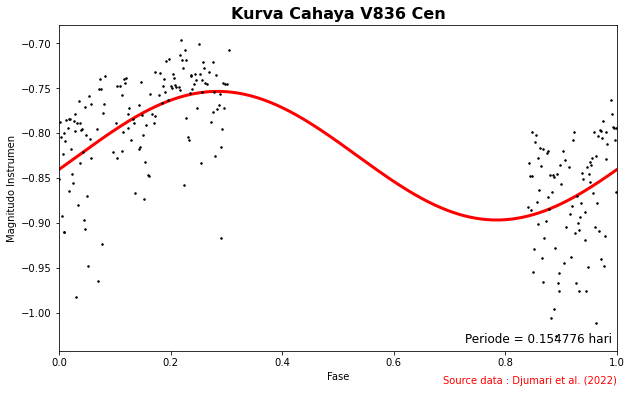

In [91]:
periode = 0.1547760000
freqq = 1/periode
print("The fit period is %10.7f days" % periode)
# calculate model fit based on period 
tfit = np.linspace(0,periode,1000)
rvfit = LombScargle(t,lk).model(tfit,1/periode)
K = 0.5*(np.max(rvfit)-np.min(rvfit))
print("The fit semi-amplitude is %10.5f" % K)
# phase the data and plot it with the fit
phase = t % periode
fig,ax = plt.subplots(figsize=(10,6))
ax.errorbar(phase/periode,lk,fmt=".k", markersize=3)
ax.plot(tfit/periode,rvfit,"-r",linewidth=3)
ax.text(1, -0.1, 'Source data : Djumari et al. (2022)',color='red',ha='right',transform=ax.transAxes)
plt.annotate("Periode = {0:.6f} hari".format(periode), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
plt.title('Kurva Cahaya V836 Cen',fontsize=16,fontweight='bold',ha='center')
plt.xlabel('Fase')
plt.ylabel('Magnitudo Instrumen')
plt.xlim(0,1)
plt.show()